In [2]:
! pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [4]:
df_train=pd.read_csv("house_price_train.csv")

In [5]:
df_train.drop("Id",axis=1,inplace=True) ## reduntatnt
output_col=df_train['SalePrice']
df_train=df_train.drop('SalePrice',axis=1)

In [6]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [7]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

##  PREPROCESSING


In [8]:
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

<AxesSubplot: >

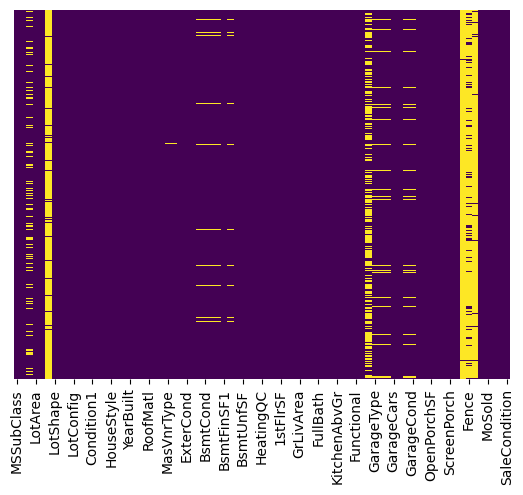

In [9]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

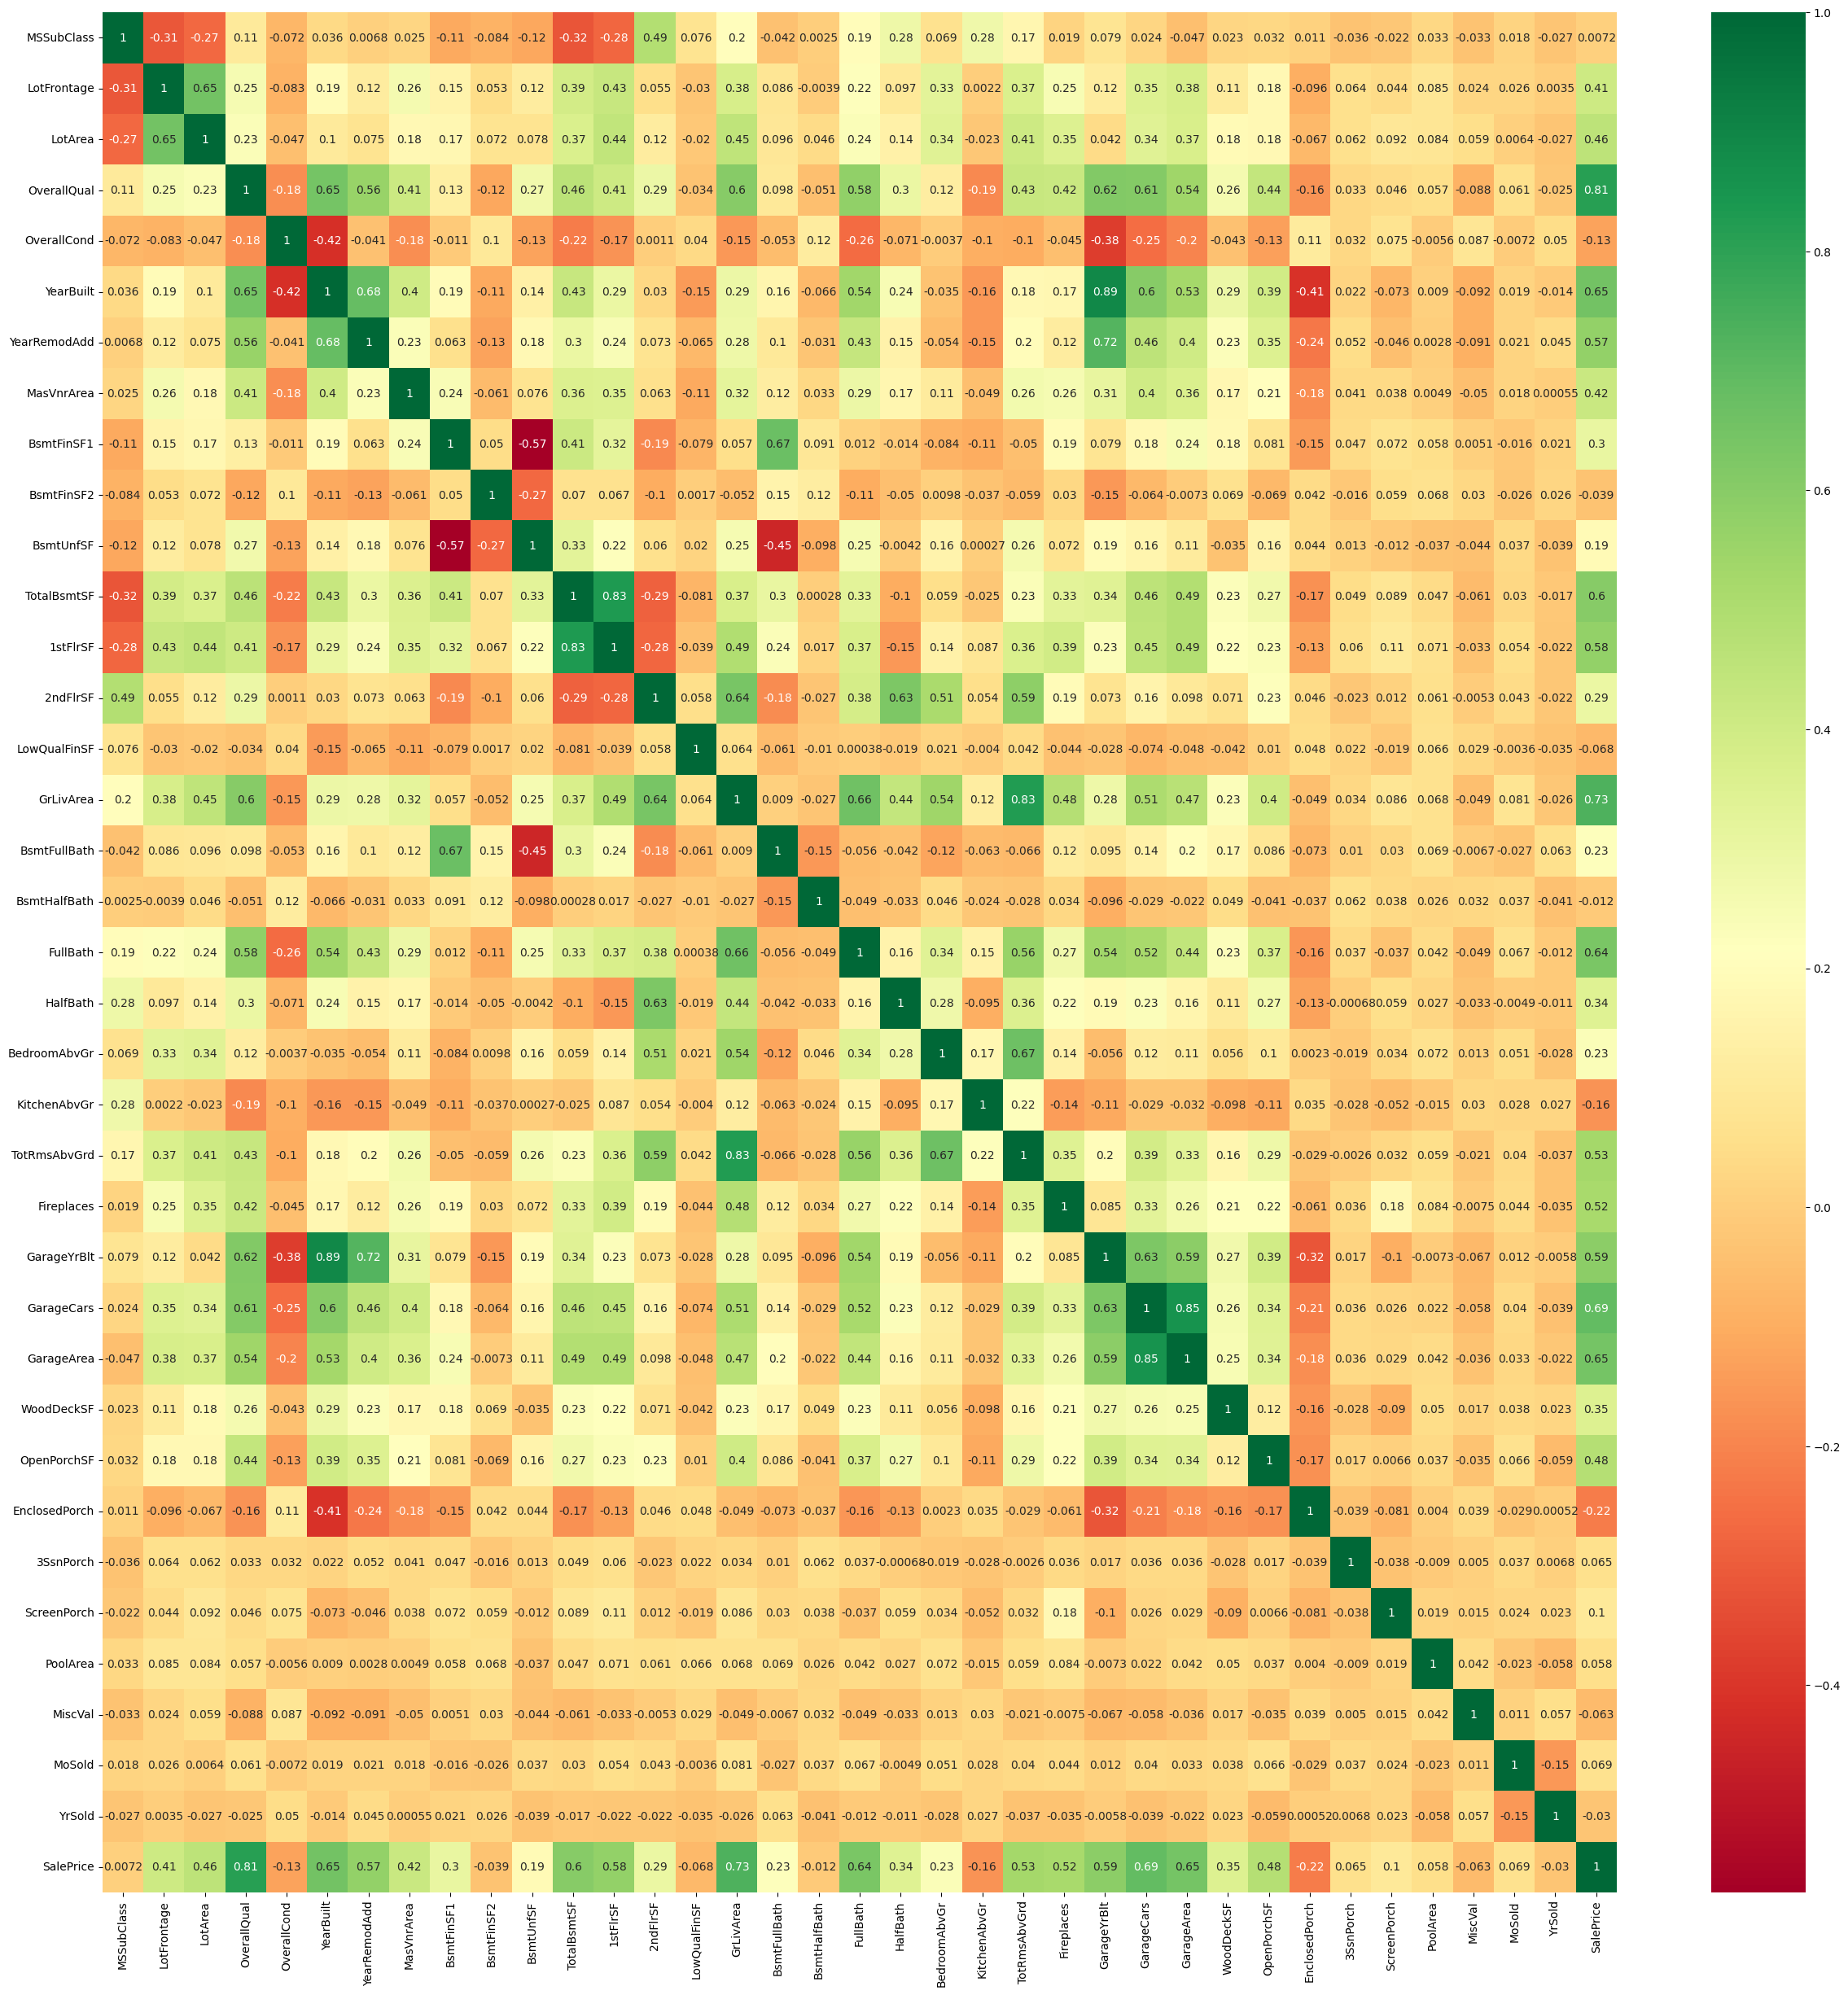

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([df_train,output_col],axis=1).loc[:,list(pd.concat([df_train,output_col],axis=1).select_dtypes(include= np.number).columns)].corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

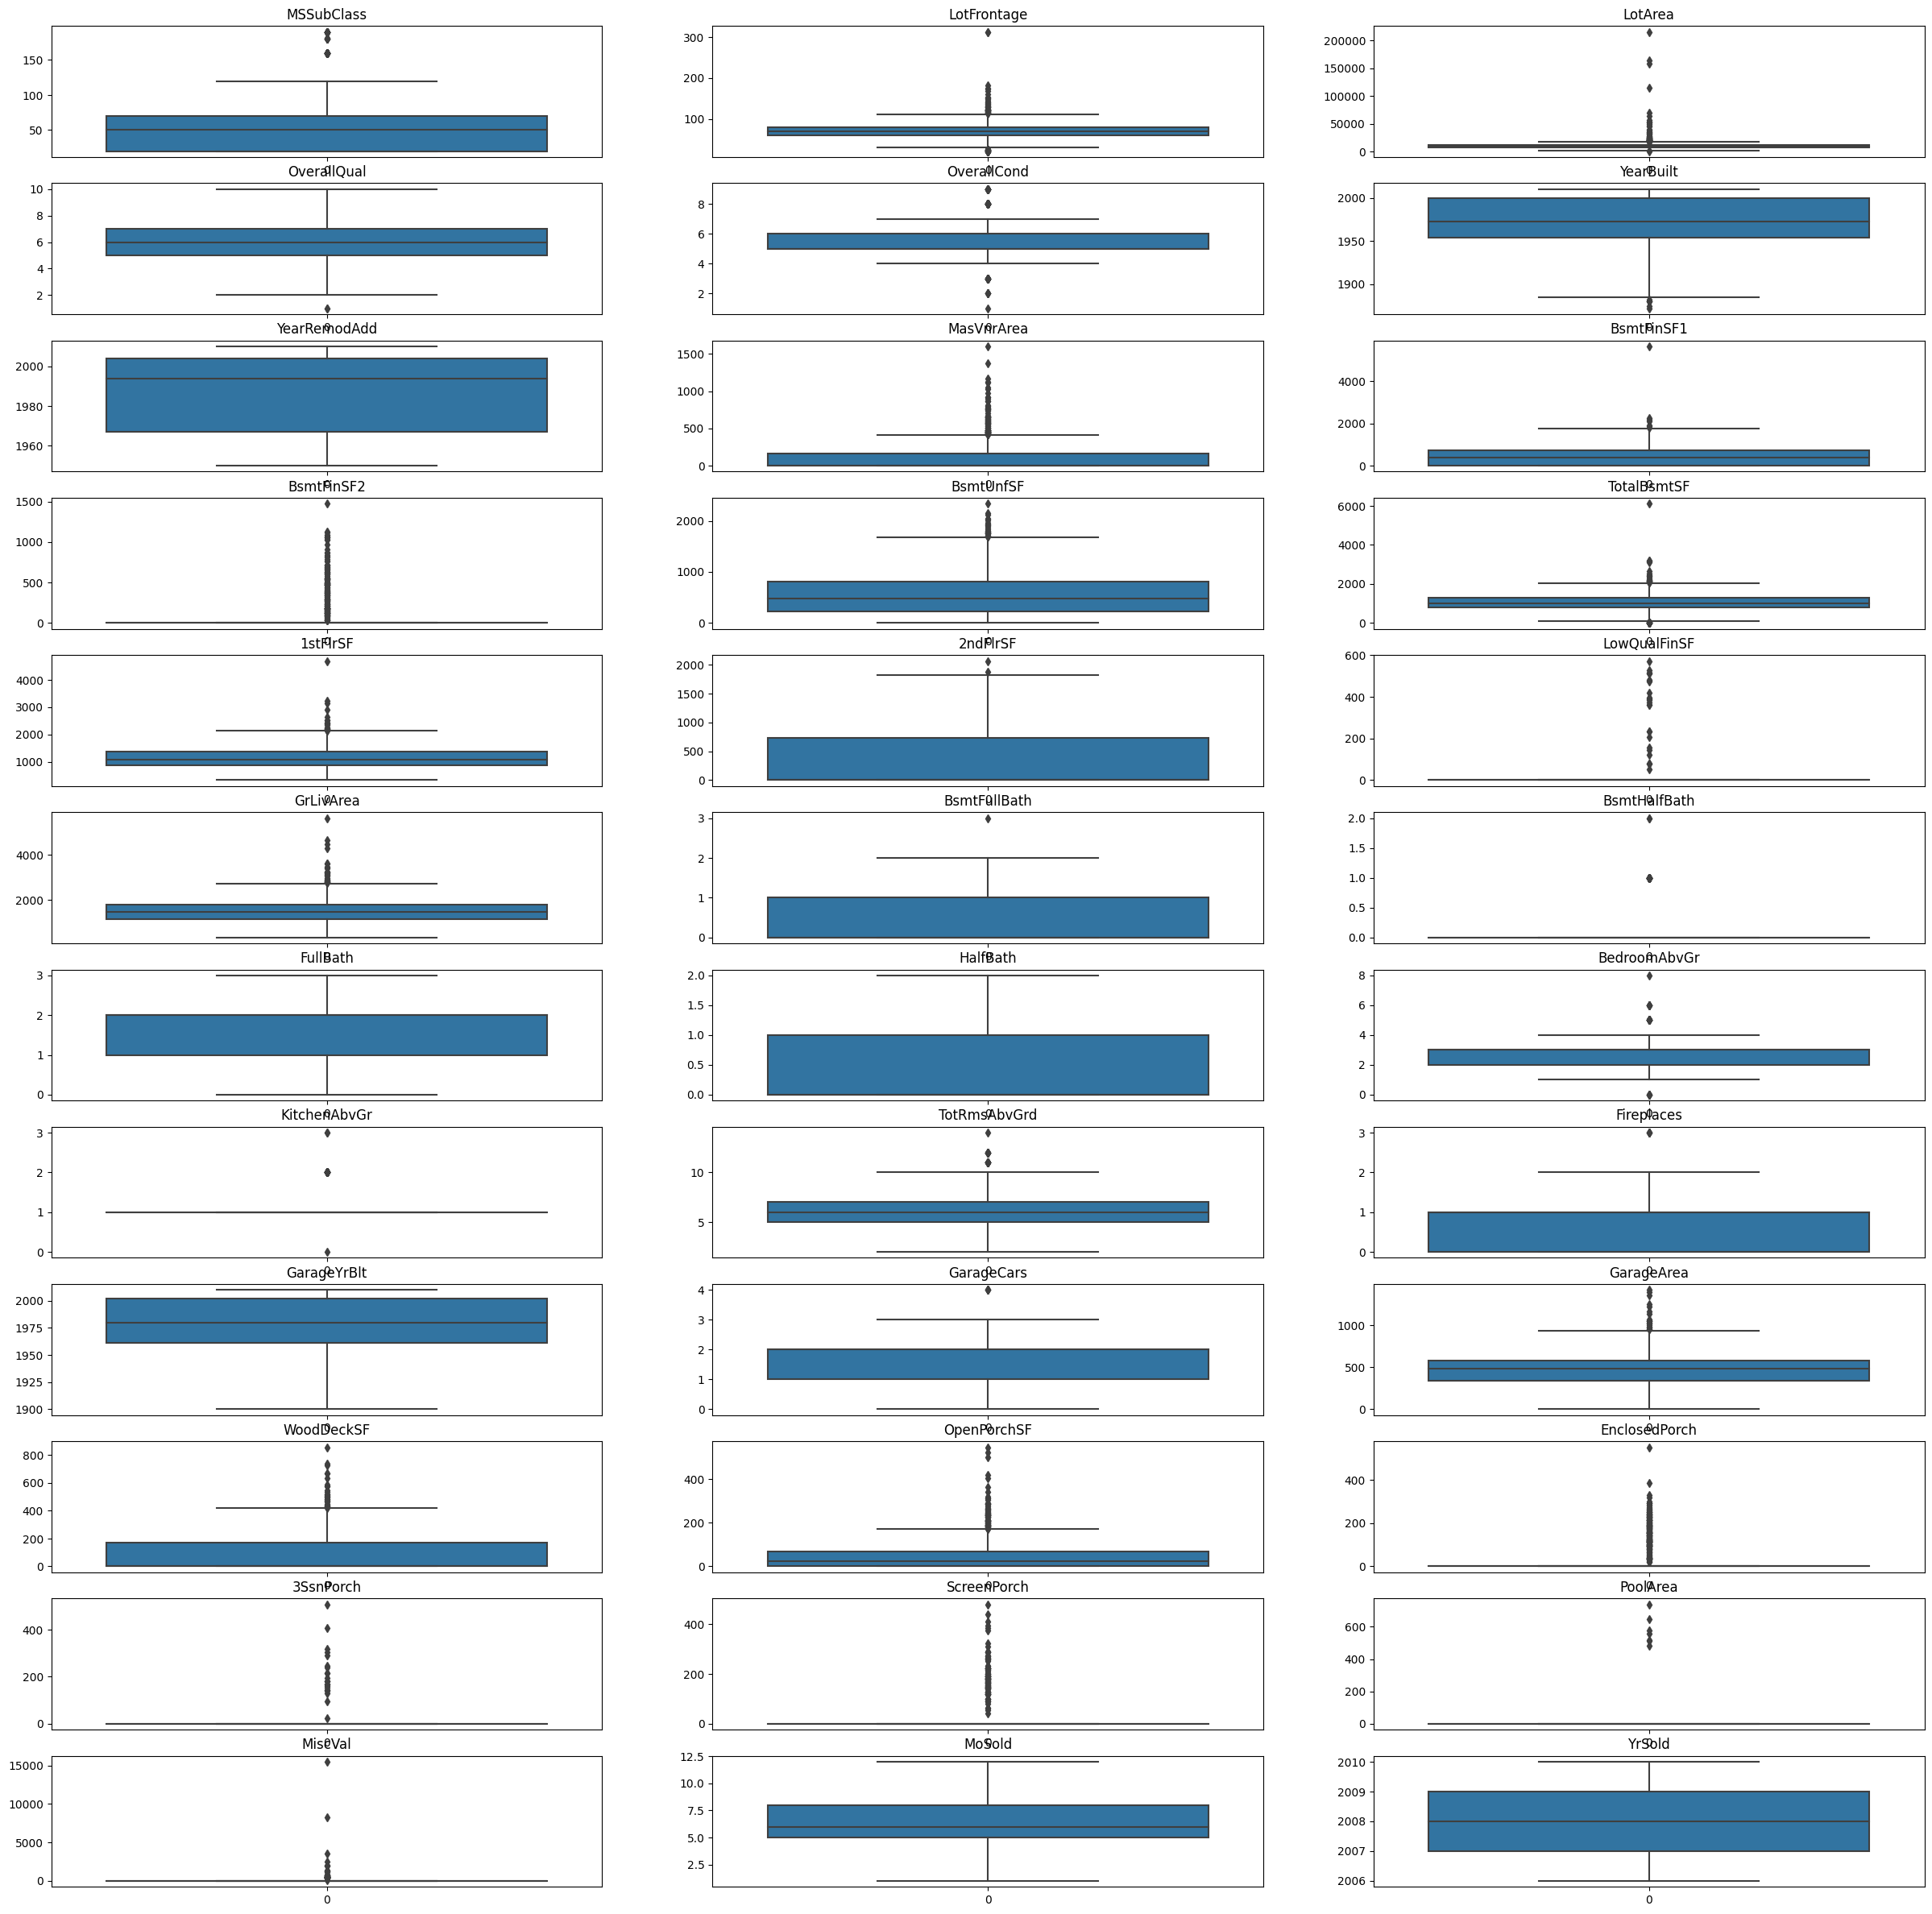

In [11]:
fig, axes = plt.subplots(nrows = 12, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)
cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    print()
    sns.boxplot(df_train[col], ax = ax)
    ax.set_title(col)

C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Loc

C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Loc

C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Loc

C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)
C:\Users\mritu\AppData\Local\Temp\ipykernel_2684\721392038.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


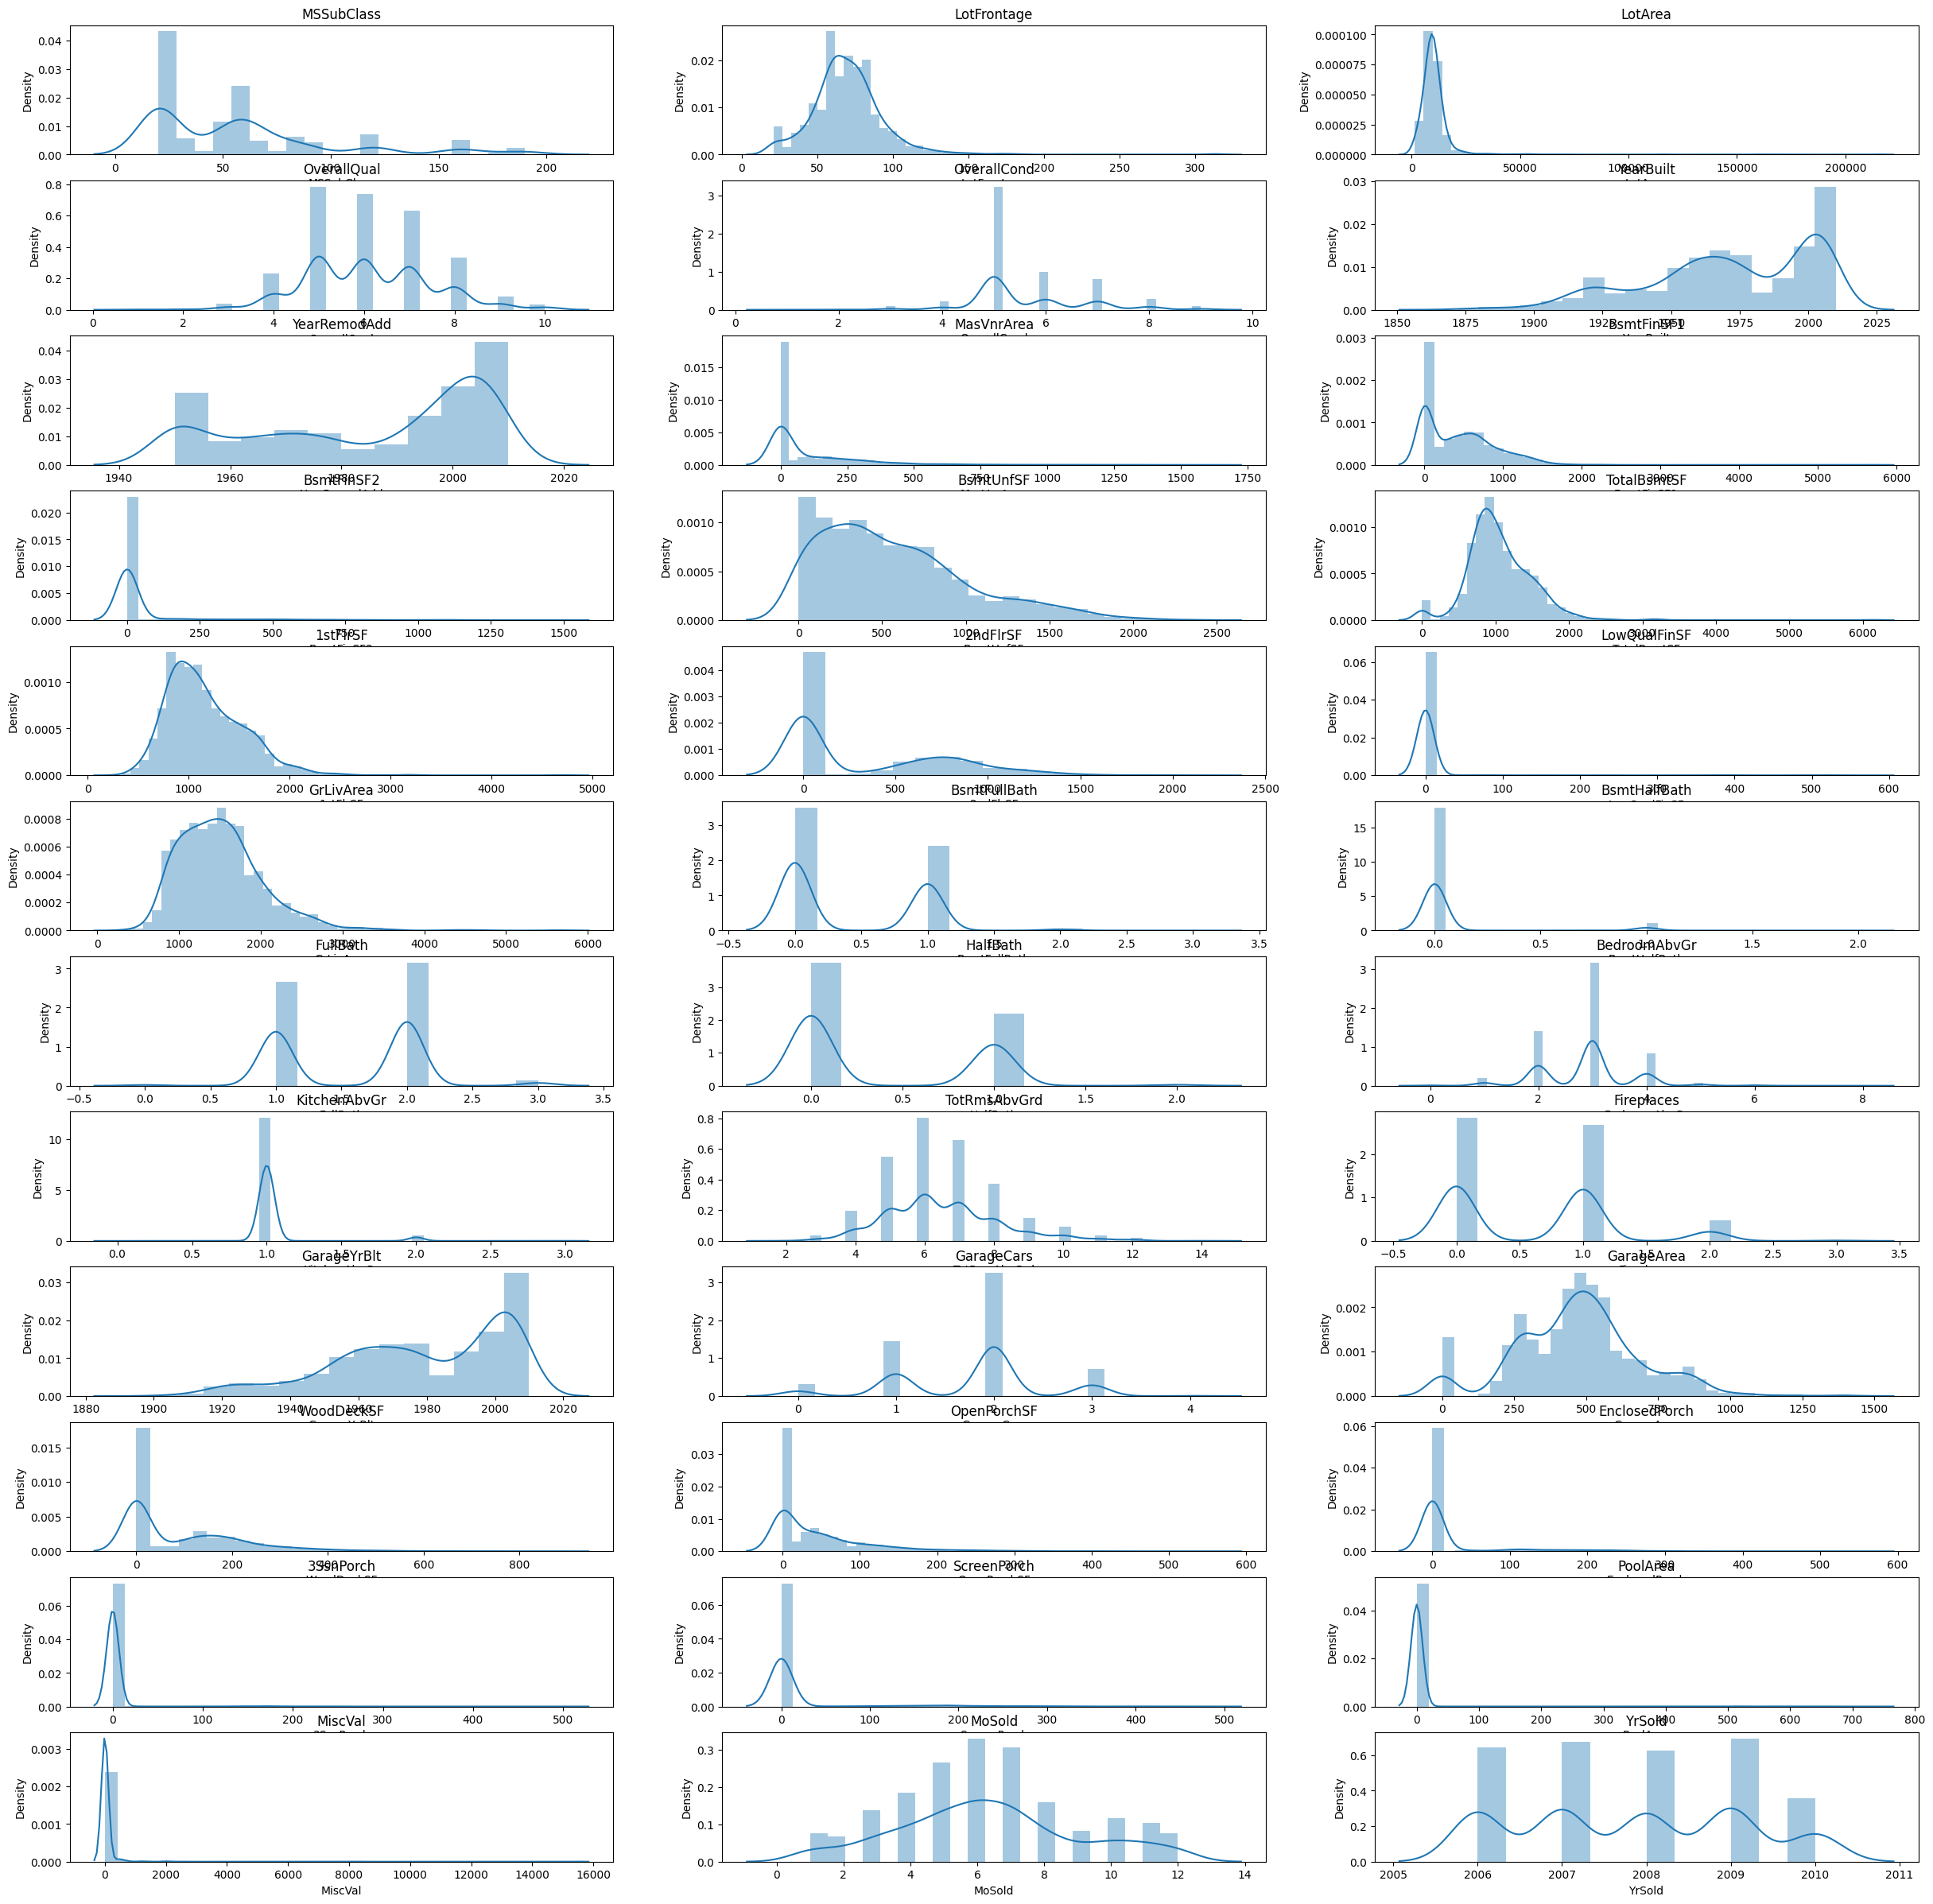

In [12]:
fig, axes = plt.subplots(nrows = 12, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30,30)
cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

In [13]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [14]:
negative_values_cols=dict()

for cols in df_train.columns:
    if df_train[cols].dtypes=='int64' or df_train[cols].dtypes=='float64':
        c=0
        for values in df_train[cols]:
            if values<0:
                c+=1
        if c!=0:
            negative_values_cols[cols]=c
print(negative_values_cols)
 

{}


In [15]:
# Columns which have zero values in more than 50% rows are removed
def column_with_most_reduntant_values(reduntant_value,df_train:pd.DataFrame,threshold:float):
    reduntant_counts={}
    columns_with_most_reduntant_counts=[]
    for col in df_train.columns:
        if df_train[col].dtypes=='int64' or df_train[col].dtypes=='float64':
            for values in df_train[col]:
                if values==reduntant_value:
                    reduntant_counts[col]=1+reduntant_counts.get(col,0)
    for col in reduntant_counts:
        if reduntant_counts[col]>=(threshold*len(df_train)):
            columns_with_most_reduntant_counts.append(col)
    df_train.drop(columns_with_most_reduntant_counts,axis=1,inplace=True)

In [16]:
column_with_most_reduntant_values(reduntant_value=0,df_train=df_train,threshold=0.5)

In [17]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageCond,PavedDrive,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,61,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,TA,Y,0,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,TA,Y,42,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,TA,Y,35,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,TA,Y,84,NaN,NaN,NaN,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,40,NaN,NaN,NaN,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,0,NaN,MnPrv,NaN,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,60,NaN,GdPrv,Shed,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TA,Y,0,NaN,NaN,NaN,4,2010,WD,Normal


In [18]:

def column_with_most_reduntant_null_values(threshold,df_train:pd.DataFrame):
    null_cols=[]
    for col in df_train.columns:
        if df_train[col].isnull().sum()>=(threshold*len(df_train)):
            null_cols.append(col)
    df_train.drop(null_cols,axis=1,inplace=True)

In [19]:
column_with_most_reduntant_null_values(threshold=0.5,df_train=df_train)

In [20]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,548,TA,TA,Y,61,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2,460,TA,TA,Y,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,608,TA,TA,Y,42,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,3,642,TA,TA,Y,35,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,3,836,TA,TA,Y,84,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,460,TA,TA,Y,40,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2,500,TA,TA,Y,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,252,TA,TA,Y,60,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,240,TA,TA,Y,0,4,2010,WD,Normal


In [21]:
continuous_cols=list(df_train.select_dtypes(include= np.number).columns)

In [22]:
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)

In [23]:
most_correlated=dict()
for col1 in continuous_cols:
    for col2 in continuous_cols:
        if col1!=col2 and abs(df_train[col1].corr(df_train[col2],method='spearman'))>=0.80:
            if (col1 not in most_correlated) and (col2 not in most_correlated):
                most_correlated[col1]=col2

In [24]:
df_train.drop(columns=list(most_correlated),axis=1,inplace=True)

In [25]:
def fill_null_values(for_numerical_cols:str,for_categorical_cols:str,df_train):
    for cols in df_train.columns:
        if df_train[cols].dtype=="int64" or df_train[cols].dtype=="float64":
            if for_numerical_cols=="median":
                median_=df_train[cols].median()
                df_train[cols].fillna(median_,inplace=True)
        elif df_train[cols].dtype=="object":
            if for_categorical_cols=="most_frequent":
                d=list(df_train[cols].value_counts().index) # most frequent
                df_train[cols].fillna(d[0],inplace=True)

In [ ]:
fill_null_values(for_numerical_cols="median",for_categorical_cols="most_frequent",df_train=df_train)

In [ ]:
for col in df_train.columns:
    if df_train[col].isnull().sum()>(0):

        print(col,df[col].isnull().sum(),df_train[col].dtypes)


In [186]:
continuous_cols=list(df_train.select_dtypes(include= np.number).columns)

In [187]:
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)

In [188]:
df_train=pd.concat([output_col,df_train],axis=1) # since rows will be deleted here


In [189]:
# Outlier delete

for col in continuous_cols:
    q1=df_train[col].quantile(0.25)
    q3=df_train[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print("[",l,",",h,"]")
    df_train = df_train[(df_train[col] <= h)] 
    df_train = df_train[(df_train[col] >=l)] 



In [190]:
output_col=df_train['SalePrice']
df_train.drop("SalePrice",axis=1,inplace=True)

In [191]:

def encoding_categorical_cols(df_train:pd.DataFrame,categorical_columns:list,strategy:str):
    df_categorical=pd.DataFrame(df_train.loc[:,categorical_columns])
    if strategy=="labelencoder":
        for col in list(df_categorical.columns):
            cat=[]
            d={}

            cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])

            for j in range(int(cat[0][1])):
                d[str(cat[0][0][j])]=j
            df_categorical[col]=df_categorical[col].map(d)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        
        df_train=pd.concat([df_train,df_categorical],axis=1)
        
    if strategy=="onehotencoder":
        one_hot_encoded=pd.get_dummies(df_categorical)
        # print(one_hot_encoded)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        df_train=pd.concat([df_train,one_hot_encoded],axis=1)
    return df_train
        

In [192]:
df_train=encoding_categorical_cols(df_train=df_train,categorical_columns=categorical_cols,strategy="labelencoder")

In [193]:
df_train.loc[:,continuous_cols].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,1stFlrSF,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,OpenPorchSF,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1984.865753,443.639726,567.240411,1162.626712,1.565068,2.866438,1.046575,6.517808,0.613014,1978.589041,472.980137,46.660274,6.321918,2007.815753
std,42.300571,22.027677,9981.264932,1.382997,1.112799,20.645407,456.098091,441.866955,386.587738,0.550916,0.815778,0.220338,1.625393,0.644666,23.997022,213.804841,66.256028,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,223.000000,882.000000,1.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,334.500000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1994.000000,383.500000,477.500000,1087.000000,2.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,480.000000,25.000000,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2004.000000,712.250000,808.000000,1391.250000,2.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,576.000000,68.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,5644.000000,2336.000000,4692.000000,3.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,547.000000,12.000000,2010.000000


In [194]:
for col in df_train.columns:
    if df_train[col].isnull().sum()>0:
        print(col)

In [195]:
### SCALING

In [196]:
scaler=scaler=MinMaxScaler()
df_train=pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns,)
df_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,1stFlrSF,FullBath,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.235294,0.150685,0.033420,0.666667,0.500,0.883333,0.125089,0.064212,0.119780,0.666667,...,0.333333,0.000000,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.433333,0.173281,0.121575,0.212942,0.666667,...,0.000000,0.000000,0.25,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.866667,0.086109,0.185788,0.134465,0.666667,...,0.333333,0.000000,0.25,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.333333,0.038271,0.231164,0.143873,0.333333,...,0.333333,0.000000,0.00,0.2,0.0,0.0,0.0,0.0,0.0,0.4
4,0.235294,0.215753,0.060576,0.777778,0.500,0.833333,0.116052,0.209760,0.186095,0.666667,...,0.333333,0.000000,0.25,0.0,0.5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.833333,0.000000,0.407962,0.142038,0.666667,...,0.000000,0.000000,0.25,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.633333,0.139972,0.252140,0.399036,0.666667,...,0.000000,0.333333,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.933333,0.048724,0.375428,0.195961,0.666667,...,0.333333,0.000000,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.766667,0.008682,0.000000,0.170721,0.333333,...,0.333333,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
from sklearn.metrics import r2_score

In [198]:
X=df_train
Y=output_col

In [199]:
accuracies={}

In [200]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=None,shuffle=True)


In [201]:
def sf_selector(algo:str,forward:bool,floating:bool,scoring:int,X_train,Y_train,X_test,Y_test,min_featues:int,cv:int,verbose:int):
    model=eval(algo)
    sfs=SFS(model, 
           k_features=(min_featues,len(X_train.columns)), 
           forward=forward, 
           floating=floating, 
           verbose=verbose,
           scoring=scoring,
           cv=cv,
           n_jobs=-1)
    sfs=sfs.fit(X_train, Y_train)
    print("Selected Features",sfs.k_feature_names_)
    model_=eval(algo)
    model_.fit(X_train.loc[:,list(sfs.k_feature_names_)],Y_train)
    score=model_.score(X_test.loc[:,list(sfs.k_feature_names_)],Y_test)
    
    print(f"Prediction using selected features using {model_} is :",score)
    accuracies[model]=score

In [202]:
sf_selector(algo="LinearRegression()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    4.9s finished

[2023-02-13 18:37:27] Features: 1/58 -- score: 0.630576756132698[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    0.3s finished

[2023-02-13 18:37:28] Features: 2/58 -- score: 0.7002235478903774[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    0.3s finished

[2023-02-13 18:37:28] Features: 3/58 -- score: 0.7216304703616684[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.3s finished

[2023-02-13 18:37:28] Features: 4/58 -- score: 0.7362336734089203[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n

[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2023-02-13 18:37:42] Features: 37/58 -- score: 0.7982102242932478[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished

[2023-02-13 18:37:42] Features: 38/58 -- score: 0.7979297207970337[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished

[2023-02-13 18:37:42] Features: 39/58 -- score: 0.7976135608314779[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.3s finished

[2023-02-13 18:37:43] Features: 40/58 -- sc

Selected Features ('LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtUnfSF', '1stFlrSF', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'OpenPorchSF', 'YrSold', 'MSZoning', 'Street', 'Utilities', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'PavedDrive')
Prediction using selected features using LinearRegression() is : 0.7866534677678663


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-02-13 18:37:46] Features: 56/58 -- score: -3.427835045437321e+23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-02-13 18:37:46] Features: 57/58 -- score: -3.3855552521095906e+23[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-02-13 18:37:46] Features: 58/58 -- score: -3.57547622497748e+23

In [43]:
sf_selector(algo="RandomForestRegressor()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   28.0s finished

[2023-02-13 17:00:41] Features: 1/70 -- score: 0.7081983233870632[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:   28.1s finished

[2023-02-13 17:01:10] Features: 2/70 -- score: 0.7343318989328568[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:   30.9s finished

[2023-02-13 17:01:41] Features: 3/70 -- score: 0.7701484197694872[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  67 out o

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   32.0s finished

[2023-02-13 17:22:56] Features: 31/70 -- score: 0.8762448133188337[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:   31.5s finished

[2023-02-13 17:23:27] Features: 32/70 -- score: 0.8752615893720204[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:   58.7s finished

[2023-02-13 17:24:26] Features: 33/70 -- score: 0.8751804796250283[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:   42.6s finished

[2023-02-13 17:25:09] Features: 34/70 -- score: 0.8772536120001029[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   39.9s finished

[2023-02-1

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.6s finished

[2023-02-13 17:42:08] Features: 67/70 -- score: 0.863694104201689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.0s finished

[2023-02-13 17:42:13] Features: 68/70 -- score: 0.8566381529971505[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.2s finished

[2023-02-13 17:42:16] Features: 69/70 -- score: 0.8553716613544523[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.6s finished

[2023-02-13 17:42:19] Features: 70/70 -- score: 0.8575302755565154

Selected Features ('OverallQual', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'EnclosedPorch', 'MiscVal', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'MasVnrType', 'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCond')
Prediction using selected features using RandomForestRegressor() is : 0.9065859366374239


In [203]:
sf_selector(algo="SVR()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   10.9s finished

[2023-02-13 18:38:06] Features: 1/58 -- score: -0.0490259107927701[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   12.0s finished

[2023-02-13 18:38:18] Features: 2/58 -- score: -0.049177968975722706[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   11.3s finished

[2023-02-13 18:38:30] Features: 3/58 -- score: -0.049267211186864966[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  5

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.0s finished

[2023-02-13 18:44:19] Features: 34/58 -- score: -0.05071271160633417[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    6.5s finished

[2023-02-13 18:44:25] Features: 35/58 -- score: -0.050741513481881474[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    6.5s finished

[2023-02-13 18:44:32] Features: 36/58 -- score: -0.05077043914384518[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    6.4s finished

[2023-02-13 18:44:38] Features: 37/58 -- score: -0.05080173852423[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    6.8s finished

[2023-02-13 18:44:45] Features: 38/58 -- score: -0.050835163313778

Selected Features ('Street', 'Utilities', 'ExterQual')
Prediction using selected features using SVR() is : -0.050187852511794695


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished

[2023-02-13 18:46:23] Features: 58/58 -- score: -0.051527411714231384

In [52]:
sf_selector(algo="KNeighborsRegressor()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished

[2023-02-13 17:44:59] Features: 1/70 -- score: 0.5606684736292866[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.5s finished

[2023-02-13 17:45:00] Features: 2/70 -- score: 0.7357055960666633[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.5s finished

[2023-02-13 17:45:01] Features: 3/70 -- score: 0.8049150806114362[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.6s finished

[2023-02-13 17:45:01] Features: 4/70 -- score: 0.839236388020573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    0.5s finished

[

[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.4s finished

[2023-02-13 17:45:21] Features: 36/70 -- score: 0.8368260896576476[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.3s finished

[2023-02-13 17:45:22] Features: 37/70 -- score: 0.8324168496174382[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished

[2023-02-13 17:45:22] Features: 38/70 -- score: 0.8280892080609166[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.3s finished

[2023-02-13 17:45:22] Features: 39/70 -- score: 0.8276873747215566[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.4s f

Selected Features ('OverallQual', 'YearRemodAdd', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'ExterCond', 'Foundation', 'BsmtFinType2', 'Heating', 'CentralAir', 'Functional', 'PavedDrive', 'SaleType')
Prediction using selected features using KNeighborsRegressor() is : 0.8809638197875369


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-02-13 17:45:31] Features: 69/70 -- score: 0.7873845917714279[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-02-13 17:45:31] Features: 70/70 -- score: 0.756996682674241

In [53]:
sf_selector(algo="DecisionTreeRegressor()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished

[2023-02-13 17:45:32] Features: 1/70 -- score: 0.707081507251466[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 out of  69 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.3s finished

[2023-02-13 17:45:32] Features: 2/70 -- score: 0.7304109516300772[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.3s finished

[2023-02-13 17:45:32] Features: 3/70 -- score: 0.7493538059412256[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.4s finished

[2023-02-13 17:45:33] Features: 4/70 -- score: 0.7550299162937886[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent w

[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.5s finished

[2023-02-13 17:45:48] Features: 36/70 -- score: 0.7881165801458805[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.3s finished

[2023-02-13 17:45:49] Features: 37/70 -- score: 0.7916098383968067[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.4s finished

[2023-02-13 17:45:49] Features: 38/70 -- score: 0.7929930933083675[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.4s finished

[2023-02-13 17:45:49] Features: 39/70 -- score: 0.7929699852914919[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.4s f

Selected Features ('MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition')
Prediction using selected features using DecisionTreeRegressor() is : 0.7708881929625807



[2023-02-13 17:46:00] Features: 69/70 -- score: 0.7498479922912553[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-02-13 17:46:00] Features: 70/70 -- score: 0.7197992417112786

In [54]:
sf_selector(algo="SGDRegressor()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.3s finished

[2023-02-13 17:46:01] Features: 1/70 -- score: 0.6818878400852747[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    4.8s finished

[2023-02-13 17:46:06] Features: 2/70 -- score: 0.7416855498243512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    4.8s finished

[2023-02-13 17:46:11] Features: 3/70 -- score: 0.7727528762478408[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    4.3s finished

[2023-02-13 17:46:15] Featu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.3s finished

[2023-02-13 17:48:16] Features: 31/70 -- score: 0.8928786364282619[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    3.1s finished

[2023-02-13 17:48:19] Features: 32/70 -- score: 0.8930363415851336[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    3.4s finished

[2023-02-13 17:48:23] Features: 33/70 -- score: 0.8938505404524912[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    3.0s finished

[2023-02-13 17:48:26] Features: 34/70 -- score: 0.8938241713508651[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    4.4s finished

[2023-02-1

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished

[2023-02-13 17:49:32] Features: 67/70 -- score: 0.8796256071437177[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished

[2023-02-13 17:49:32] Features: 68/70 -- score: 0.8789309818048462[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished

[2023-02-13 17:49:32] Features: 69/70 -- score: 0.8767687953910686[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Selected Features ('LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MSZoning', 'Condition1', 'HouseStyle', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'Heating', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'SaleType')
Prediction using selected features using SGDRegressor() is : 0.9073050468870663


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2023-02-13 17:49:33] Features: 70/70 -- score: 0.8734994576752143

In [55]:
sf_selector(algo="ElasticNet()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished

[2023-02-13 17:49:33] Features: 1/70 -- score: 0.10867114552455123[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.3s finished

[2023-02-13 17:49:34] Features: 2/70 -- score: 0.18283073495582208[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.3s finished

[2023-02-13 17:49:34] Features: 3/70 -- score: 0.2428678110895369[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.3s finished

[2023-02-13 17:49:34] Features: 4/70 -- score: 0.2844724448972546[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    0.4s finished

[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.4s finished

[2023-02-13 17:49:50] Features: 37/70 -- score: 0.543786588021036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.4s finished

[2023-02-13 17:49:50] Features: 38/70 -- score: 0.5438787831669722[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.4s finished

[2023-02-13 17:49:51] Features: 39/70 -- score: 0.5439523905946014[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.4s finished

[2023-02-13 17:49:51] Features: 40/70 -- score: 0.5439873054526096[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s fi

Selected Features ('LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'LotShape', 'Neighborhood', 'Condition1', 'HouseStyle', 'RoofStyle', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType')
Prediction using selected features using ElasticNet() is : 0.5688411295629043


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2023-02-13 17:50:01] Features: 68/70 -- score: 0.5435154816694301[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-02-13 17:50:01] Features: 69/70 -- score: 0.5433748348773327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-02-13 17:50:01] Features: 70/70 -- score: 0.5427869240840633

In [56]:
sf_selector(algo="Lasso()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished

[2023-02-13 17:50:01] Features: 1/70 -- score: 0.6824423674476873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.5s finished

[2023-02-13 17:50:02] Features: 2/70 -- score: 0.7430546269154064[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.5s finished

[2023-02-13 17:50:02] Features: 3/70 -- score: 0.7758118479647461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.5s finished

[2023-02-13 17:50:03] Features: 4/70 -- score: 0.8162558689034338[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent 

[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.4s finished

[2023-02-13 17:50:22] Features: 37/70 -- score: 0.8983104653401248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.5s finished

[2023-02-13 17:50:22] Features: 38/70 -- score: 0.8983104653401248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.6s finished

[2023-02-13 17:50:23] Features: 39/70 -- score: 0.8983104653401248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.4s finished

[2023-02-13 17:50:24] Features: 40/70 -- score: 0.8982863439773041[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s f

Selected Features ('LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'LotShape', 'HouseStyle', 'RoofStyle', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'KitchenQual', 'GarageType', 'SaleType')
Prediction using selected features using Lasso() is : 0.9067717576258052


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-02-13 17:50:34] Features: 70/70 -- score: 0.8766652243287636

In [57]:
sf_selector(algo="Ridge()",forward=True,floating=False,scoring="r2",X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,min_featues=3,cv=5,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.4s finished

[2023-02-13 17:50:35] Features: 1/70 -- score: 0.6770313503038203[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.3s finished

[2023-02-13 17:50:35] Features: 2/70 -- score: 0.7404570848602353[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.4s finished

[2023-02-13 17:50:36] Features: 3/70 -- score: 0.7743767563155363[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.4s finished

[2023-02-13 17:50:36] Features: 4/70 -- score: 0.8143241795244693[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    0.4s finished



[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.3s finished

[2023-02-13 17:50:52] Features: 37/70 -- score: 0.8963004936266554[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.4s finished

[2023-02-13 17:50:52] Features: 38/70 -- score: 0.8963004936266554[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.4s finished

[2023-02-13 17:50:53] Features: 39/70 -- score: 0.8963004936266554[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished

[2023-02-13 17:50:53] Features: 40/70 -- score: 0.8963004936266554[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished

[2023-02-13 17:50:53] Features: 41/70 -- score: 0.8963004936266554[Paral

Selected Features ('LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'LotShape', 'Condition1', 'HouseStyle', 'RoofStyle', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtFinType1', 'Heating', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageQual', 'SaleType')
Prediction using selected features using Ridge() is : 0.909302285017564


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2023-02-13 17:51:01] Features: 70/70 -- score: 0.8825768125074125

In [58]:
accuracies

{LinearRegression(): 0.9066436402088301,
 RandomForestRegressor(): 0.9065859366374239,
 SVR(): 0.0024973660112420637,
 KNeighborsRegressor(): 0.8809638197875369,
 DecisionTreeRegressor(): 0.7708881929625807,
 SGDRegressor(): 0.9073050468870663,
 ElasticNet(): 0.5688411295629043,
 Lasso(): 0.9067717576258052,
 Ridge(): 0.909302285017564}